In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import os

import sklearn.linear_model as linear_models
from sklearn.model_selection import cross_validate
from statsmodels.tsa.stattools import acf 
from statsmodels.stats.diagnostic import acorr_breusch_godfrey


## assuming data exploration is complete, we go next to model building

In [2]:
data_dir = os.getcwd() + '\\data_files\\'

target_df = pd.read_csv(data_dir + 'targets.csv', parse_dates=['USAGE_DATE'], index_col='USAGE_DATE')
predictor_df = pd.read_csv(data_dir + 'predictors.csv', parse_dates=['USAGE_DATE'], index_col='USAGE_DATE')
predictor_df['Holiday'] = predictor_df['Holiday'].astype(int)

df = target_df.join(predictor_df)
df = df.sort_index(ascending=False)
df.dropna(inplace=True)

In [3]:
region = 'SoCal' # can be SD or SoCal
target = df[region + '_AMI_NONAMI_MDTH']
# recapitulating vbDLFM with lags
predictors = df[[region + '_HDD',region + '_t-1_HDD', region + '_t-2_HDD',
                 region + '_CDD',region + '_t-1_CDD', 
                 region+'_HDD_7', region + '_t-1_HDD_7',
               'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
               'Sat','Sun','Holiday']]


In [47]:
lm = linear_models.LinearRegression()
# metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'explained_variance']
lm_scores = cross_validate(lm, predictors, target, cv=5, scoring=scoring)

lm.fit(predictors, target)
residual_df = pd.DataFrame(lm.predict(predictors) - target).rename(columns={target.name:'residuals'})


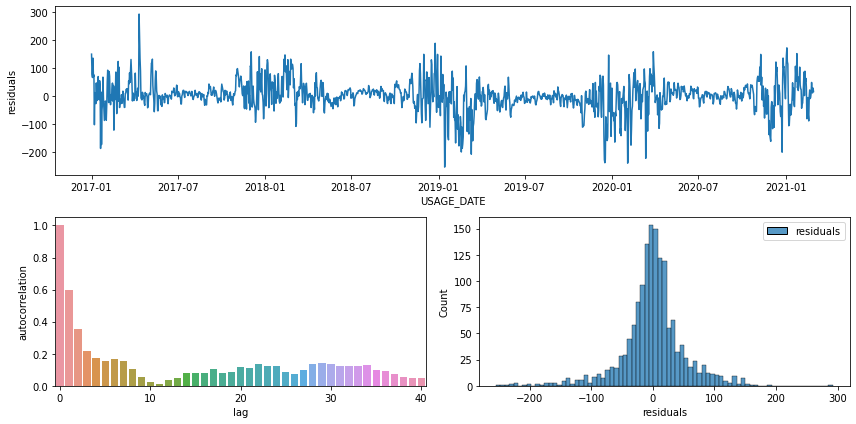

In [44]:
def check_residuals(residual_df):
    """
    :param residual_df. dataframe that contains (1).index as time (2)['residuals'] as residuals
    """
    fig = plt.figure(figsize=(12,6))
    gs = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])

    sns.lineplot(x=eval_df.index, y='residuals', data=eval_df, ax=ax1)
    sns.barplot(x=np.arange(0, 41), y=acf(eval_df['residuals'], fft=False, nlags=40), ax=ax2)
    ax2.set_xlabel('lag'), ax2.set_ylabel('autocorrelation'), ax2.set_xticks(np.arange(0, 41, 10))
    sns.histplot(eval_df, ax=ax3)
    ax3.set_xlabel('residuals'), 
    plt.tight_layout(), plt.show()
    
    
    
    

check_residuals(residual_df)

In [49]:
acorr_breusch_godfrey(residual_df['residuals'].values, nlags=40)

AttributeError: 'numpy.ndarray' object has no attribute 'resid'